In [1]:
import numpy as np
import itertools
import random
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_features', numeric_transformer, numeric_features),
        ('categorical_features', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


In [44]:
from jenga.cleaning.ppp import PipelineWithPPP
ppp = PipelineWithPPP(clf, 
                      numerical_columns=numeric_features, 
                      categorical_columns=categorical_features,
                      num_repetitions=5,
                      perturbation_fractions=[.3, .5, .6, .75, .9]
                     )
ppp.fit_ppp(X_train, y_train)
print(f'Predicted score: {ppp.predict_ppp(X_test):.4f}, true score {clf.score(X_test, y_test):.4f}')

Generating perturbed training data on 1047 rows ...
	... perturbation 0/300: swapped, col ('age', 'fare'), fraction: 0.3
	... perturbation 1/300: swapped, col ('embarked', 'pclass'), fraction: 0.3
	... perturbation 2/300: scaling, col ['age'], fraction: 0.3
	... perturbation 3/300: outlier, col ['age'], fraction: 0.3
	... perturbation 4/300: missing_MCAR, col age, fraction: 0.3
	... perturbation 5/300: missing_MAR, col age, fraction: 0.3
	... perturbation 6/300: missing_MNAR, col age, fraction: 0.3
	... perturbation 7/300: missing_MCAR, col sex, fraction: 0.3
	... perturbation 8/300: missing_MAR, col sex, fraction: 0.3
	... perturbation 9/300: missing_MNAR, col sex, fraction: 0.3
	... perturbation 10/300: missing_high_entropy, col ['embarked'], fraction: 0.3
	... perturbation 11/300: missing_low_entropy, col ['sex'], fraction: 0.3
	... perturbation 12/300: swapped, col ('age', 'fare'), fraction: 0.5
	... perturbation 13/300: swapped, col ('sex', 'pclass'), fraction: 0.5
	... perturbati

	... perturbation 121/300: swapped, col ('embarked', 'sex'), fraction: 0.3
	... perturbation 122/300: scaling, col ['age'], fraction: 0.3
	... perturbation 123/300: outlier, col ['age'], fraction: 0.3
	... perturbation 124/300: missing_MCAR, col age, fraction: 0.3
	... perturbation 125/300: missing_MAR, col age, fraction: 0.3
	... perturbation 126/300: missing_MNAR, col age, fraction: 0.3
	... perturbation 127/300: missing_MCAR, col pclass, fraction: 0.3
	... perturbation 128/300: missing_MAR, col pclass, fraction: 0.3
	... perturbation 129/300: missing_MNAR, col pclass, fraction: 0.3
	... perturbation 130/300: missing_high_entropy, col ['embarked'], fraction: 0.3
	... perturbation 131/300: missing_low_entropy, col ['pclass'], fraction: 0.3
	... perturbation 132/300: swapped, col ('age', 'fare'), fraction: 0.5
	... perturbation 133/300: swapped, col ('embarked', 'sex'), fraction: 0.5
	... perturbation 134/300: scaling, col ['age'], fraction: 0.5
	... perturbation 135/300: outlier, col 

	... perturbation 244/300: missing_MCAR, col age, fraction: 0.3
	... perturbation 245/300: missing_MAR, col age, fraction: 0.3
	... perturbation 246/300: missing_MNAR, col age, fraction: 0.3
	... perturbation 247/300: missing_MCAR, col embarked, fraction: 0.3
	... perturbation 248/300: missing_MAR, col embarked, fraction: 0.3
	... perturbation 249/300: missing_MNAR, col embarked, fraction: 0.3
	... perturbation 250/300: missing_high_entropy, col ['sex'], fraction: 0.3
	... perturbation 251/300: missing_low_entropy, col ['sex'], fraction: 0.3
	... perturbation 252/300: swapped, col ('age', 'fare'), fraction: 0.5
	... perturbation 253/300: swapped, col ('sex', 'pclass'), fraction: 0.5
	... perturbation 254/300: scaling, col ['fare'], fraction: 0.5
	... perturbation 255/300: outlier, col ['fare'], fraction: 0.5
	... perturbation 256/300: missing_MCAR, col fare, fraction: 0.5
	... perturbation 257/300: missing_MAR, col fare, fraction: 0.5
	... perturbation 258/300: missing_MNAR, col fare, 

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
from jenga.corruptions.numerical import SwappedValues, Outliers, Scaling
X_swapped = SwappedValues(0.5, ['age','fare'])(X_test.copy())

ppp_prediction, corrupted_idx = ppp.predict_and_explain_ppp(X_swapped,
                            num_percentile_neighbors = 5,
                            num_top_meta_features = 3)

print(f'Clean Score: {clf.score(X_test, y_test)}, Predicted score: {ppp.predict_ppp(X_swapped):.4f}, true score {clf.score(X_swapped, y_test):.4f}')
X_swapped.iloc[corrupted_idx]

Clean Score: 0.7862595419847328, Predicted score: 0.7637, true score 0.7863


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1302,3.0,"Yousif, Mr. Wazli",male,0.0000,0.0,0.0,2647,7.2250,None,C,None,NaN,None
1166,3.0,"Saade, Mr. Jean Nassr",male,0.0000,0.0,0.0,2676,7.2250,None,C,None,NaN,None
991,3.0,"Mamee, Mr. Hanna",male,0.0000,0.0,0.0,2677,7.2292,None,C,15,NaN,None
461,2.0,"Jarvis, Mr. John Denzil",male,15.0000,0.0,0.0,237565,47.0000,None,S,None,NaN,"North Evington, England"
1240,3.0,"Thomas, Master. Assad Alexander",male,0.4167,0.0,1.0,2625,8.5167,None,C,16,NaN,None
1050,3.0,"Nakid, Mrs. Said (Waika 'Mary' Mowad)",female,15.7417,1.0,1.0,2653,19.0000,None,C,C,NaN,None
27,1.0,"Bishop, Mrs. Dickinson H (Helen Walton)",female,91.0792,1.0,0.0,11967,19.0000,B49,C,7,NaN,"Dowagiac, MI"
1258,3.0,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,15.2458,0.0,2.0,2650,29.0000,None,C,C,NaN,None
1047,3.0,"Najib, Miss. Adele Kiamie 'Jane'",female,15.0000,0.0,0.0,2667,7.2250,None,C,C,NaN,None
1305,3.0,"Zabour, Miss. Thamine",female,14.4542,1.0,0.0,2665,0.0000,None,C,None,NaN,None


In [62]:
from jenga.corruptions.numerical import SwappedValues, Outliers, Scaling

X_outliers = Outliers(0.7, ['age'])(X_test.copy())

ppp_prediction, corrupted_idx = ppp.predict_and_explain_ppp(X_outliers,
                            num_percentile_neighbors = 10,
                            num_top_meta_features = 1)

print(f'Clean Score: {clf.score(X_test, y_test):.2}\nPredicted score: {ppp.predict_ppp(X_outliers):.2f}\nTrue score {clf.score(X_outliers, y_test):.2f}\n')

X_outliers['corrupted'] = X_outliers['age']!=X_test['age']
print(f"Truly corrupted found {X_outliers.iloc[corrupted_idx]['corrupted'].sum()}/{len(corrupted_idx)}")
X_outliers.iloc[corrupted_idx][['name','age','corrupted']]

Clean Score: 0.79
Predicted score: 0.74
True score 0.72

Truly corrupted found 8/10


,name,age,corrupted
1125,"Petersen, Mr. Marius",-37.823012,True
406,"Faunthorpe, Mr. Harry",7.794063,True
317,"Williams, Mr. Richard Norris II",68.073088,True
977,"Lovell, Mr. John Hall ('Henry')",-36.021297,True
1075,"Odahl, Mr. Nils Martin",-38.669131,True
80,"Crafton, Mr. John Bertram",36.453536,True
202,"McGough, Mr. James Robert",36.000000,False
47,"Calderhead, Mr. Edward Pennington",42.000000,False
528,"Parkes, Mr. Francis 'Frank'",10.939846,True
1215,"Smith, Mr. Thomas",-22.469486,True


In [56]:
(X_outliers.iloc[corrupted_idx]['age']!=X_test.iloc[corrupted_idx]['age']).sum()

10

In [28]:
len(set(X_outliers.iloc[corrupted_idx].name) & set(X_outliers[X_test['age']!=X_outliers['age']].name))

48

In [24]:
X_outliers.loc[X_outliers.iloc[corrupted_idx].index]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
18,1.0,"Bazzani, Miss. Albina",female,52.382469,0.0,0.0,11813,76.2917,D15,C,8,NaN,None
1124,3.0,"Peters, Miss. Katie",female,-41.552108,0.0,0.0,330935,8.1375,None,Q,None,NaN,None
349,2.0,"Brown, Miss. Amelia 'Mildred'",female,-8.027611,0.0,0.0,248733,13.0000,F33,S,11,NaN,"London / Montreal, PQ"
92,1.0,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,22.582529,1.0,0.0,17474,57.0000,B20,S,3,NaN,"Calgary, AB"
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,22.340919,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1.0,"Hogeboom, Mrs. John C (Anna Andrews)",female,30.721356,1.0,0.0,13502,77.9583,D11,S,10,NaN,"Hudson, NY"
483,2.0,"Leitch, Miss. Jessie Wills",female,0.000000,0.0,0.0,248727,33.0000,None,S,11,NaN,"London / Chicago, IL"
108,1.0,"Fleming, Miss. Margaret",female,39.094932,0.0,0.0,17421,110.8833,None,C,4,NaN,None
513,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,7.786430,1.0,0.0,237736,30.0708,None,C,None,NaN,"New York, NY"


In [155]:
corruptions = {
#     lambda x: SwappedValues(x, ['age','fare']),
    lambda x: Outliers(x, ['age']),
    lambda x: Outliers(x, ['fare']),
    lambda x: Scaling(x, ['age']),
    lambda x: Scaling(x, ['fare']),
}

fractions = [.6, .7, .8, .9, .99]

n_reps = 10

results = []
for _ in range(n_reps):
    for corruption in corruptions:
        for fraction in fractions:
            corrupt = corruption(fraction)
            X_corrupted = corrupt(X_test.copy())
            ppp_prediction, corrupted_idx = ppp.predict_and_explain_ppp(X_corrupted,
                                num_percentile_neighbors = 20,
                                num_top_meta_features = 1)
            X_corrupted['corrupted'] = X_corrupted[corrupt.columns[0]]!=X_test[corrupt.columns[0]]
            truly_corrupted = X_corrupted.iloc[corrupted_idx]['corrupted'].sum()
            found_corrupted = len(corrupted_idx)

            results.append({
                'fraction': fraction,
                'corruption': corrupt.__class__,
                'clean_score': clf.score(X_test, y_test),
                'predicted_corrupted_score': ppp_prediction,
                'true_corrupted_score': clf.score(X_corrupted, y_test),
                'truly_corrupted': truly_corrupted,
                'found_corrupted': found_corrupted
            })

results_df = pd.DataFrame(results)

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)
/Users/felix/anaconda3/envs/ppp/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  Fut

In [156]:
aggregated_results = results_df.groupby('fraction').mean()
aggregated_results

,clean_score,predicted_corrupted_score,true_corrupted_score,truly_corrupted,found_corrupted
fraction,,,,,
0.60,0.78626,0.746382,0.741412,8.750,20.0
0.70,0.78626,0.741555,0.734924,14.225,20.0
0.80,0.78626,0.735482,0.731107,16.775,20.0
0.90,0.78626,0.727692,0.720324,18.775,20.0
0.99,0.78626,0.727730,0.714790,19.925,20.0


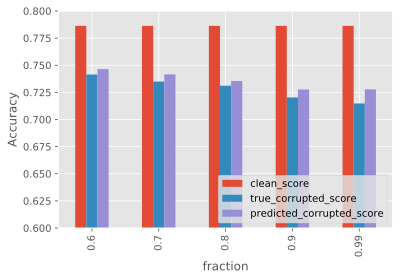

In [157]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

aggregated_results[['clean_score','true_corrupted_score','predicted_corrupted_score']].plot.bar()
plt.ylim([.6,.8])
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.savefig('ppp-anomaly-detection.pdf')

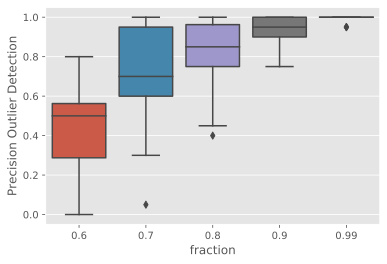

In [158]:
import seaborn as sns
results_df['precision_corruption_detection'] = results_df['truly_corrupted'] / results_df['found_corrupted']
sns.boxplot(x="fraction", y="precision_corruption_detection", data=results_df)
plt.ylabel('Precision Outlier Detection')
plt.savefig('precision-outlier-detection.pdf')